<a href="https://colab.research.google.com/github/Anima-iwr/SU_HD_Workshop/blob/main/Introduction_to_Causal_Inference_and_ITE_Estimation_2025_outcomes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *2nd Sorbonne-Heidelberg Workshop on AI in medicine: Machine Learning for multi-modal data*
---
---
MIISM Group of Prof. Hesser

contact: andrei.sirazitdinov@medma.uni-heidelberg.de or marcus.buchwald@medma.uni-heidelberg.de

---

*The seperate section are collapsed: Uncollapse the sections by clicking on the ">" logo left to the section title.*


### **First step**:
#### **please copy the Google Colab File ("*File*" -> "*Save Copy in Drive*"), than open this copy before starting to work on it.**

# What is Causal Inference?

Have you ever heard the phrase "correlation is not causation"? In this workshop, we'll explore the deeper meaning behind that idea and why it's important to distinguish between the two.

This brings us to the concept of causal inference — a field dedicated to **uncovering causal relationships between variables by making specific causal assumptions**. Understanding this helps us move beyond simply observing correlations to identifying cause-and-effect dynamics.

As this is a workshop on articificial intelligence in medicine, let's first take a look on it from the machine learning perspective.
Building on standard machine learning concepts, we use input data $X$ (also called covariate features, such as patient information) and output data $Y$ (the outcome, like a health result). However, in causal inference (especially in Causal Treatment Effect Estimation), we also introduce a new element: $T$, or treatment, which represents the action taken on a patient. For instance, $T$ could refer to a specific medical intervention. These relationships between $X$, $T$, and $Y$ are often depicted using a directed acyclic graph (DAG), which illustrates complex causal structures.

While correlation describes the statistical relationship between variables, causality seeks to answer more fundamental questions like:

- **What happens to other variables if we intervene on a variable?**
- **What is the effect of one variable on another?**


### Why Is Causal Inference Important?

Causal inference is essential in many fields like economics, medicine, public policy, and marketing, where decision-makers need to understand the impact of actions, treatments, or policies. For example:

- In healthcare, causal inference helps determine the effect of a drug on patient recovery.
- In economics, it can measure the impact of a policy change on unemployment rates.
- In business, it assists in understanding the effect of marketing campaigns on sales.

### How can you measure causal effects?

In general, the most reliable way to measure the causal effect of an action (referred to as a "treatment") on a system of interest (the "outcome") is through a randomized controlled trial (RCT).

However, conducting such controlled experiments is often impractical or unethical. In these situations, analysts must rely on observational data, i.e. data collected without the benefit of a controlled experimental setup.

---

# Challenges with causal inference for observational data

The challenge with observational data is that the observed effects can be influenced by various factors, including both genuine causal relationships and unrelated correlations (also known as spurious correlations), which can lead to misleading conclusions.

### **What are confounders?**

Correlation refers to a statistical relationship where two variables move together, but it does not imply that one causes the other. Causation, on the other hand, indicates that changes in one variable directly result in changes in another.

**Confounders are variables that influence both the independent and dependent variables, creating a false impression of a relationship between them**. This can lead to the mistaken assumption of causation when, in fact, the confounder is the true underlying factor affecting both variables (see Figure 3).

<center>
<figure><img src=https://github.com/dyh1265/Causal-Inference-Library/blob/master/images/spurrious_correlation.png?raw=true width="500"><figcaption> Figure 1. An example of an easily recognizable spurious correlation.
</a></figcaption></figure>
</center>

<center>
<figure><img src=https://github.com/dyh1265/Causal-Inference-Library/blob/master/images/caus_and_corr.png?raw=true width="300"><figcaption> Figure 2. A comparison between correlation and causation.
</a></figcaption></figure>
</center>

You have already seen the example in *Figure 3* in the talk by Prof. Hesser but it is a very famous example of spurrious correlation as it was published in high-ranking medical journal.

<center><figure><img src=https://github.com/dyh1265/Causal-Inference-Library/blob/master/images/chocolate_nobel-laureates.png?raw=true width="600"><figcaption> Figure 3. Spurrious correlation of chocolate consumption and nobel laureates (source: Messerli FH. Chocolate consumption, cognitive function, and Nobel laureates. N Engl J Med. 2012 doi: 10.1056/NEJMon1211064)
</a></figcaption></figure></center>

However, the issue with interpreting a causal relation from this graph is that the experiment does not account for the Gross Domestic Producs (GDP). If we account for the GDP, the apparent correlation vanishes. In the context of the graphs you can think of controlling for the GDP by binning the countries so that countries with similar GDP are grouped together. If you fix the GDP by only regarding one bin, the plot showoing chocolate consumption to numbers of nobel laureates wont depict a positive correlation anymore.

<center><figure><img src=https://github.com/dyh1265/Causal-Inference-Library/blob/master/images/causal-effect-chocolate-nobel.png?raw=true width="500"><figcaption> Figure 4. Causal graph depicting the spurrious correlation of chocolate consumption and nobel laureates (source: Kondo et al. "Causal-Effect Analysis using Bayesian LiNGAM Comparing with Correlation Analysis in Function Point Metrics and Effort. 10.33889/IJMEMS.2018.3.2-008.)
</a></figcaption></figure></center>

In this example, we can see in *Figure 5* graph D & E that the GDP positively correlates with nobel laureates and with chocolate consumption. One might actually argue a causal relationship as the GDP directly influences the education of the country as well as the purchase power of the citizens.

<center><figure><img src=https://github.com/dyh1265/Causal-Inference-Library/blob/master/images/gdp_to_nobels.png?raw=true width="1000"><figcaption> Figure 5. Different graphs depicting number of laureates as a function of treatments (source: Maurage et al. "Does chocolate consumption really boost Nobel Award chances? The peril of over-interpreting correlations in health studies." The Journal of nutrition, 143 6, 931-3 .)
</a></figcaption></figure></center>

**So we have seen, that a confounder, i.e. a variable which causes both the treatment and the outcome, can result in spurrious inference when dealing with oberservational data.**


### **What is selection bias?**

**So why don't we just controll for all variables we can get? Sadly, it is not so easy..**

To show why, let's go back a step: We have learned that confounding occurs when the treatment and outcome share a common cause.
For instance, if education is the treatment and income is the outcome, it is difficult to determine the true effect of education on income because they both share a common cause: intelligence. One could argue that higher earnings among more educated people may result from their intelligence, not just their education. To identify the causal effect, we need to block all backdoor paths between the treatment and outcome. By doing this, the only remaining effect is the direct one.

In this example, if we control for intelligence—comparing people with the same intelligence but different levels of education—any difference in income will be due to education alone, since intelligence is held constant.

<center><figure><img src=https://github.com/dyh1265/Causal-Inference-Library/blob/master/images/confounding_example.png?raw=true width="300"><figcaption> Figure 6. Example of the confounding variable "Intelligence" in the mentioned example (source: https://matheusfacure.github.io/python-causality-handbook/04-Graphical-Causal-Models.html)
</a></figcaption></figure></center>

While we can't directly measure intelligence, we can capture some of its causes, like the education levels of the father and mother, as well as some of its effects, such as IQ or SAT scores. Controlling for these surrogate variables doesn’t fully eliminate bias, but it does help reduce it.

<center><figure><img src=https://github.com/dyh1265/Causal-Inference-Library/blob/master/images/all_confounders_exmple.png?raw=true width="500"><figcaption> Figure 7. Surrogates of "Intelligence" to account for the confounder (source: https://matheusfacure.github.io/python-causality-handbook/04-Graphical-Causal-Models.html)
</a></figcaption></figure></center>


Now the second major bias comes into play - selection bias. It's helpful to distinguish this from confounding bias. While confounding occurs when we fail to control for a common cause, selection bias is more about controlling for effects. Economists often use "selection bias" to describe various biases, so it's worth clarifying.

<center><figure><img src=https://github.com/dyh1265/Causal-Inference-Library/blob/master/images/selection_bias_problem.png?raw=true width="350"><figcaption> Figure 8. source: https://matheusfacure.github.io/python-causality-handbook/04-Graphical-Causal-Models.html.
</a></figcaption></figure></center>


Selection bias often happens when we control for too many variables. For example, the treatment and outcome might be independent but become dependent when we condition on a collider.

Imagine you could randomize education to measure its effect on wages. To avoid confounding, you control for several variables, including investments. However, investment isn’t a common cause of education and wages but rather a consequence of both—more educated people tend to earn and invest more. By controlling for investment (a collider), you unintentionally create a secondary link between education and wages, complicating the measurement of the direct effect. Essentially, you focus on groups with similar investments, limiting wage variation and preventing you from observing how education truly affects wages.
In other words, among those who invest, the ones who manage to do so even without education are more likely to achieve high earnings, which as a consequence introduces bias. Conditioned on investing, higher education is associated with low wages and we have a negative bias.

<center><figure><img src=https://github.com/dyh1265/Causal-Inference-Library/blob/master/images/collider_example.png?raw=true width="300"><figcaption> Figure 9. Example of a selection bias through a collider variable (source: https://matheusfacure.github.io/python-causality-handbook/04-Graphical-Causal-Models.html)
</a></figcaption></figure></center>



Similar thing happens when we condition on a mediator of the treatment. A mediator is a variable between the treatment and the outcome. For example, suppose again you can randomize education. But, just to be sure, you decide to control whether or not the person had a white-collar job. Once again, this conditioning biasses the causal effect estimation. This time, not because it opens a front door path with a collider (as it was the case with "investments"), but because it closes one of the channels through which the treatment operates. In this example, getting a white-collar job is one way how more education leads to higher pay. By controlling it, we close this channel and leave open only the direct effect of education on wages.

<center><figure><img src=https://github.com/dyh1265/Causal-Inference-Library/blob/master/images/mediator_selection_bias.png?raw=true width="350"><figcaption> Figure 10. Example of a selection bias through a mediater variable (source: https://matheusfacure.github.io/python-causality-handbook/04-Graphical-Causal-Models.html)
</a></figcaption></figure></center>

In other words, among those who manage to get a white-collar job, the ones without education are probably more hard-working and are more likely to achieve high earnings than those who require the help of education to get the same job are, which as a consequence introduces again negative bias.

---


# **Task 1:** Seeing the effect of the selection bias

**Now let's take a look at a medical example:**

In this task, you will work through an example that simulates the relationship between various health factors—such as genetic predisposition, cholesterol levels, and risk of a heart attack. Specifically, you will explore **how controlling for a collider impacts the observed relationships between variables**.

<center>
<figure><img src=https://github.com/dyh1265/Causal-Inference-Library/blob/master/images/collider_task.png?raw=true width="300"><figcaption>.
</a></figcaption></figure>
</center>

**Scenario**: We are simulating a medical setting where patients’ genetic predisposition influences their cholesterol levels, which in turn both affects their likelihood of taking cholesterol medication and the risk of a heart attack. Our goal is to investigate the bias introduced when we control for a collider (medication use).

In [1]:
!pip install numpy
!pip install pandas
!pip install statsmodels
!pip install plotnine

In [2]:
#@title Task

import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import plotnine as p
from plotnine.themes import theme
import warnings

# Suppress plotnine warnings Koko
warnings.filterwarnings("ignore", category=UserWarning)

# Set random seed for reproducibility
np.random.seed(42)

# Generate data of 2500 random genetic predispositions
n = 2500

"""
TASK 1:
------
Code the equations:
Generate the "Genetic Predisposition" using n normally distributed variables.

Define the "High Cholesterol" variable as a linear function of "Genetic Predisposition"
with a random noise offset. The scaling factor for "Genetic Predisposition" should be equal to 1.5.

Define the "Risk of Heart Attack" variable as a linear function of "High Cholesterol"
with a random noise offset. The scaling factor should be 0.5.

Define the "Cholesterol Medication" variable as a linear function of "High Cholesterol" and "Risk of Heart Attack"
with a random noise offset. The scaling factors should be 0.4 and 0.6 respectively.
Later we will binarize the "Cholesterol Medication" based on the 85% percentile to highlight the problem of collider controlling!
"""

# genetic_predisposition =                                                        # Independent variable
# high_cholesterol =                                                              # Dependent variable - High Cholestoral
# risk_of_heart_attack =                                                        # Outcome - Risk of Heart Attack (Y)
# cholesterol_medication =                                                        # Collider  - Cholestorol Medication(M)

'\nTASK 1:\n------\nCode the equations:\nGenerate the "Genetic Predisposition" using n normally distributed variables.\n\nDefine the "High Cholesterol" variable as a linear function of "Genetic Predisposition"\nwith a random noise offset. The scaling factor for "Genetic Predisposition" should be equal to 1.5.\n\nDefine the "Risk of Heart Attack" variable as a linear function of "High Cholesterol"\nwith a random noise offset. The scaling factor should be 0.5.\n\nDefine the "Cholesterol Medication" variable as a linear function of "High Cholesterol" and "Risk of Heart Attack"\nwith a random noise offset. The scaling factors should be 0.4 and 0.6 respectively.\nLater we will binarize the "Cholesterol Medication" based on the 85% percentile to highlight the problem of collider controlling!\n'

In [ ]:
#@title Hint

# Use np.random.normal(size) and set the argument "size" to generate random variables.

In [3]:
#@title Solution

# Of course the factors could are chosen empirically!

genetic_predisposition = np.random.normal(size=n)  # Independent variable
high_cholesterol = 1.5 * genetic_predisposition + np.random.normal(size=n)  # Dependent variable - High Cholestoral
risk_of_heart_attack = 0.5 * high_cholesterol + np.random.normal(size=n)  # Outcome - Risk of Heart Attack (Y)
cholesterol_medication = 0.4 * high_cholesterol + 0.6 * risk_of_heart_attack + np.random.normal(size=n)  # Collider  - Cholestorol Medication(M)


**Please execute the above task cell after solving the task.**

**The next code cell you may just execute, you do not need to alter it but you are welcome to do so.**

*What the following code cell does:*

The code generates a Pandas Dataframe of the all included variables and defines a 'Medication' column which is binarized according to whether a patient’s score exceeds the 85th percentile.

A function get_regression_params is defined to calculate the intercept, slope, and R² value for a linear regression model.

Three plots are created using plotnine

In [4]:
#@title Rest of the Code

# Create a DataFrame
data_collider = pd.DataFrame({
    'genetic_predisposition': genetic_predisposition,
    'high_cholesterol': high_cholesterol,
    'cholesterol_medication': cholesterol_medication,
    'risk_of_heart_attack': risk_of_heart_attack
})

# Calculate the score (sum of high_cholesterol and risk of heart attack) and the 85th percentile
data_collider['score'] = data_collider['high_cholesterol'] + data_collider['risk_of_heart_attack']
percentile_85 = np.percentile(data_collider['score'], 85)

# Create a binary variable 'medication' based on the 85th percentile.
# We do this to reference that people who have cholesterol medication are likely to be both at CA risk and
# have high cholesterol.
data_collider['medication'] = (data_collider['score'] > percentile_85).astype(int)

# Function to get regression parameters for each group, including intercept, slope, and R-squared
def get_regression_params(data, formula):
    model = smf.ols(formula=formula, data=data).fit()
    intercept = model.params.iloc[0]  # Intercept
    slope = model.params.iloc[1]      # Slope
    r_squared = model.rsquared        # R-squared value
    return intercept, slope, r_squared

# Get regression parameters for the plots
params_no_control = get_regression_params(data_collider, 'risk_of_heart_attack ~ high_cholesterol')
params_med_control = get_regression_params(data_collider[data_collider['medication'] == 1], 'risk_of_heart_attack ~ high_cholesterol')
params_no_med_control = get_regression_params(data_collider[data_collider['medication'] == 0], 'risk_of_heart_attack ~ high_cholesterol')

# Plot: Risk of Heart Attack vs High Cholesterol (No control for medication)
plot4 = (
    p.ggplot(data_collider, p.aes(x='high_cholesterol', y='risk_of_heart_attack')) +
    p.geom_point(size=0.5) +
    p.geom_smooth(method='lm', color='blue') +
    p.labs(title='Risk of CA vs High Cholesterol (No Control)', x='High Cholesterol', y='Risk of Heart Attack') +
    p.xlim(-4, 4) +
    p.ylim(-4, 4) +
    p.geom_label(
        x=-3, y=3.5,
        label=f'Intercept: {params_no_control[0]:.2f}\nSlope: {params_no_control[1]:.2f}\nR²: {params_no_control[2]:.2f}',
        size=8, color='black', fill='orange'
    ) +
    p.theme(plot_title=p.element_text(ha='center'))  # Center the plot title
)

# Plot: Controlling for medication (Collider)
plot5 = (
    p.ggplot(data_collider[data_collider['medication'] == 1], p.aes(x='high_cholesterol', y='risk_of_heart_attack')) +
    p.geom_point(size=0.5) +
    p.geom_smooth(method='lm', color='red') +
    p.labs(title='Risk of CA vs High Cholesterol (Medication Group)', x='High Cholesterol', y='Risk of Heart Attack') +
    p.xlim(-4, 4) +
    p.ylim(-4, 4) +
    p.geom_label(
        x=-3, y=3.5,
        label=f'Intercept: {params_med_control[0]:.2f}\nSlope: {params_med_control[1]:.2f}\nR²: {params_med_control[2]:.2f}',
        size=8, color='black', fill='orange'
    ) +
    p.theme(plot_title=p.element_text(ha='center'))  # Center the plot title
)

# Plot: No Medication Group
plot6 = (
    p.ggplot(data_collider[data_collider['medication'] == 0], p.aes(x='high_cholesterol', y='risk_of_heart_attack')) +
    p.geom_point(size=0.5) +
    p.geom_smooth(method='lm', color='green') +
    p.labs(title='Risk of CA vs High Cholesterol (No-Medication Group)', x='High Cholesterol', y='Risk of Heart_Attack') +
    p.xlim(-4, 4) +
    p.ylim(-4, 4) +
    p.geom_label(
        x=-3, y=3.5,
        label=f'Intercept: {params_no_med_control[0]:.2f}\nSlope: {params_no_med_control[1]:.2f}\nR²: {params_no_med_control[2]:.2f}',
        size=8, color='black', fill='orange'
    ) +
    p.theme(plot_title=p.element_text(ha='center'))  # Center the plot title
)

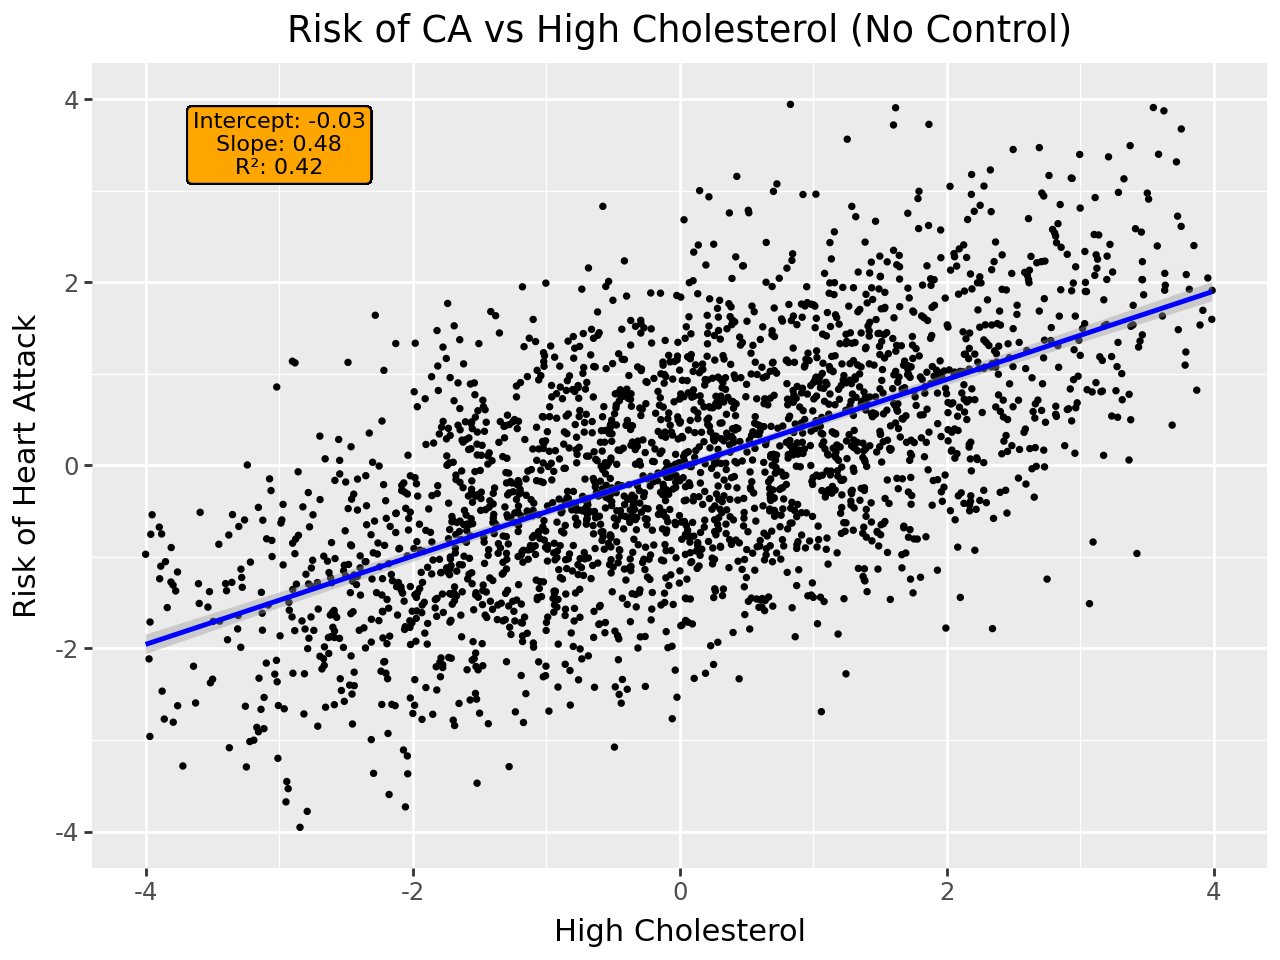

In [5]:
# Display the plots
plot4

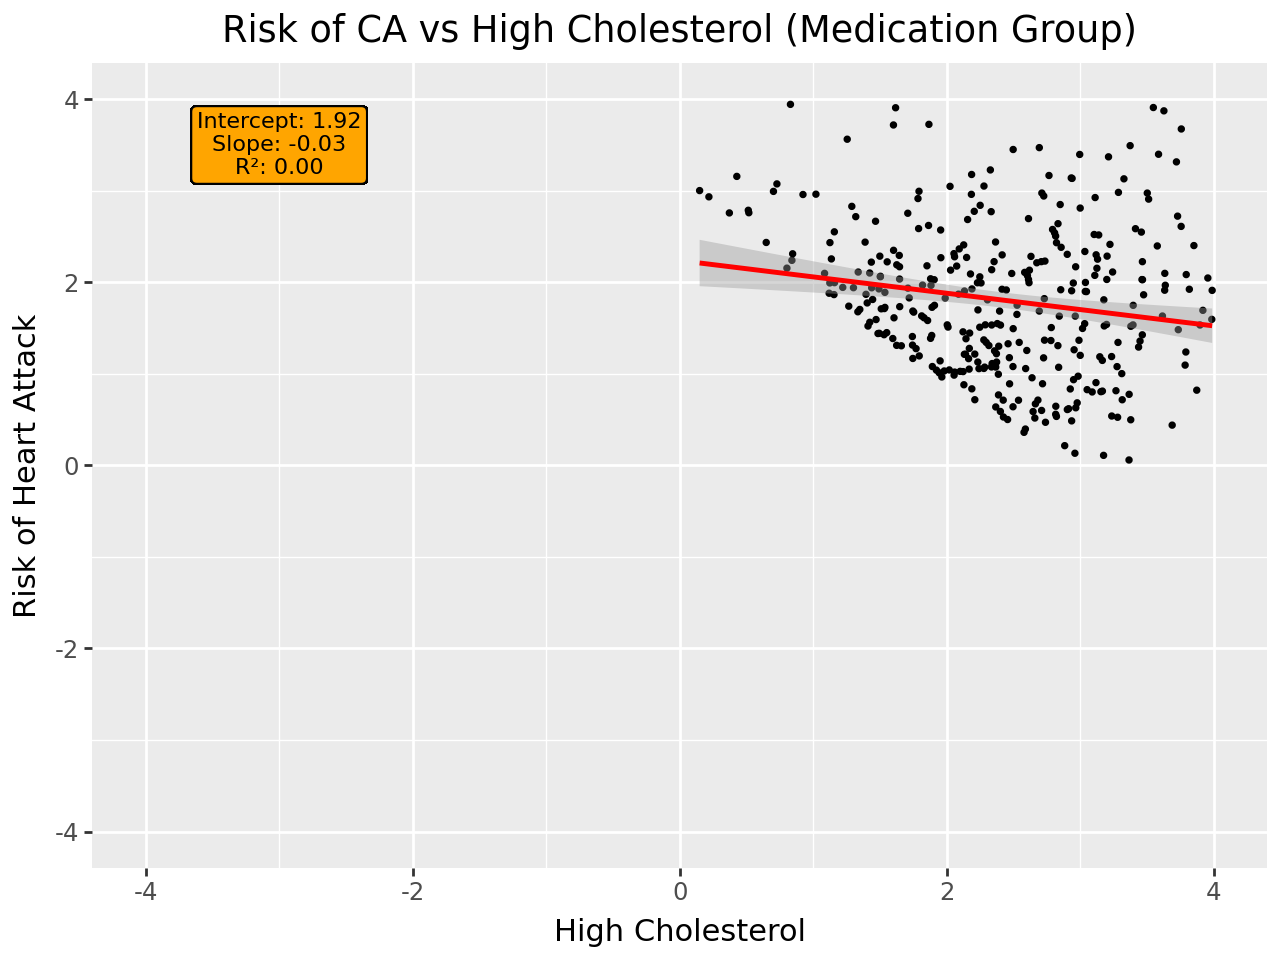

In [6]:
# Display the plots
plot5

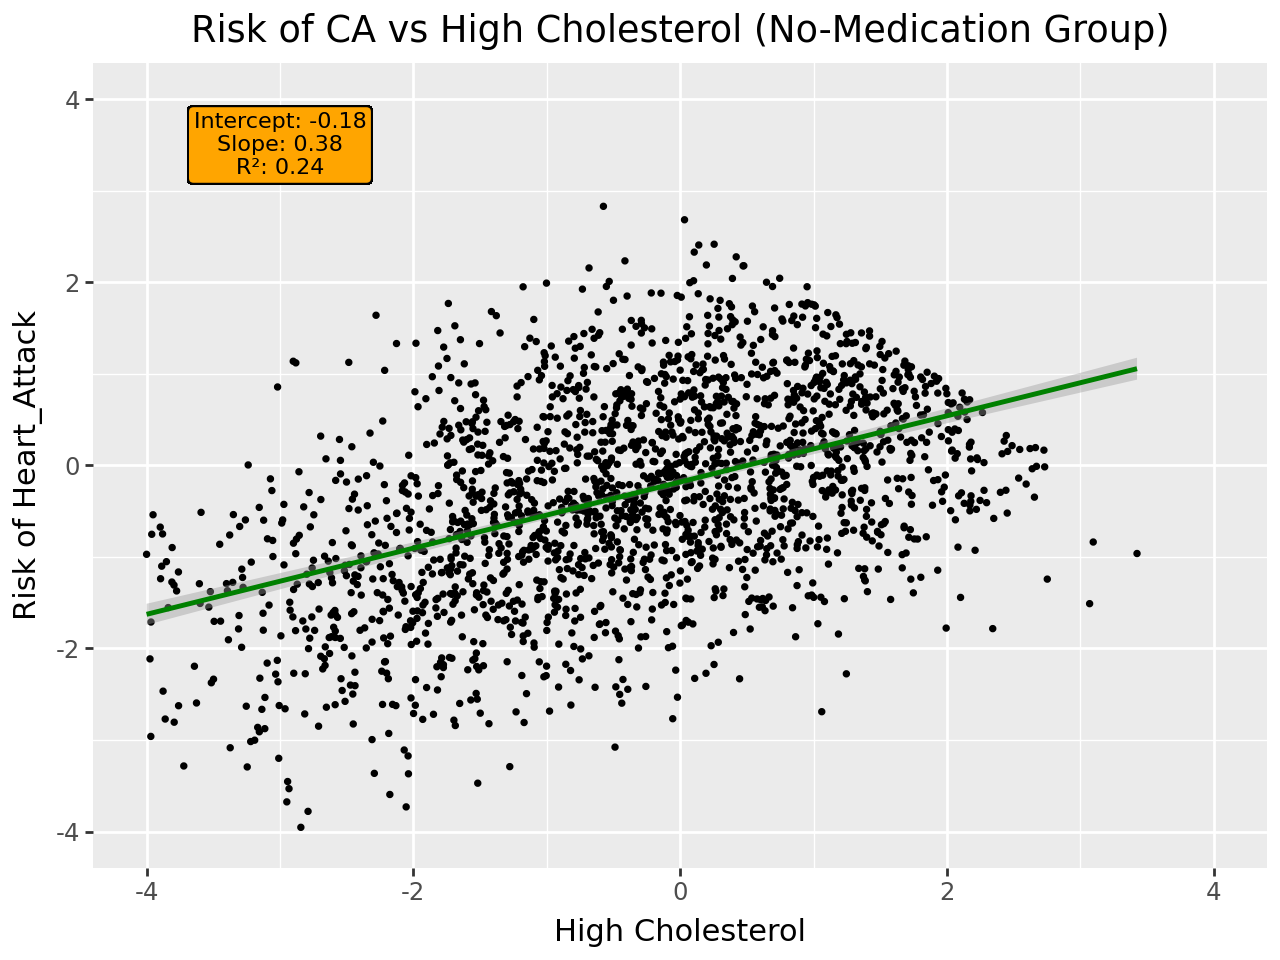

In [7]:
# Display the plots
plot6

## Questions

**What can you observe?**

**Can you think of an example of a mediator influencing the outcome which itself influenced by the exposure (genetic predisposition)**.


# Fundamentals and Mathematics of Treatment Effect Estimation


### This is just theoretical background for the interested reader!



Causal treatment effect estimation is the process of quantifying the impact of a specific intervention or treatment on an outcome of interest, while accounting for confounding factors. It aims to measure the difference in outcomes between a treated group and a control group, ensuring that this difference is due to the treatment itself rather than other external variables. In observational studies, where random assignment is not possible, methods such as propensity score matching, instrumental variables, or regression analysis are used to control for confounders.

The fundamental goal is to isolate the causal effect, ensuring that the observed relationship is not spurious or driven by other influences. For example, in medicine, causal treatment effect estimation can help determine whether a new drug improves patient recovery, independent of factors like age, health history, or other treatments. By accurately estimating treatment effects, researchers can make more informed decisions, allowing policymakers or practitioners to adopt interventions that have a true, positive impact on outcomes. The challenge lies in distinguishing correlation from causation, especially in non-experimental data, where confounding biases are harder to control.

<figure><img src=https://github.com/dyh1265/Causal-Inference-Library/blob/master/images/chd.png?raw=true width="800"><figcaption> Figure 11. Overview over Causal Inference Causal Inference
</a></figcaption></figure>


## Potential Outcomes Framework

The **potential outcomes framework** defines causal effects using hypothetical outcomes under different treatment conditions. Core concepts include the **average treatment effect (ATE)**, **conditional average treatment effect (CATE)**, and **individual treatment effect (ITE)**, as well as the **do operator** from causal inference.

#### 1. **Potential Outcomes**

For each unit $i$, define two potential outcomes:
- $Y_i(1)$: outcome if patient $i$ receives treatment,
- $Y_i(0)$: outcome if patient $i$ does not receive treatment.

Only one outcome is observed for each unit based on the treatment assignment $ T_i $. The observed outcome is:

$$
Y_i^{obs} = T_i Y_i(1) + (1 - T_i) Y_i(0)
$$

#### 2. **Individual Treatment Effect (ITE)**

The **ITE** measures the treatment effect for a specific individual:

$$
\text{ITE}_i = Y_i(1) - Y_i(0)
$$

However, this is unobservable since both $Y_i(1)$ and $Y_i(0)$ cannot be observed for the same individual.

#### 3. **Average Treatment Effect (ATE)**

The **ATE** captures the average causal effect of the treatment across the population:

$$
\text{ATE} = \mathbb{E}[Y(1) - Y(0)] = \mathbb{E}[Y(1)] - \mathbb{E}[Y(0)]
$$

It represents the expected difference in outcomes between treated and untreated populations.

#### 4. **Conditional Average Treatment Effect (CATE)**

The **CATE** measures the treatment effect for subgroups defined by covariates $X$:

$$
\text{CATE}(X) = \mathbb{E}[Y(1) - Y(0) \mid X = x]
$$

This highlights heterogeneous effects based on specific characteristics.

#### 5. **Do Operator and Causal Inference**

The **do operator**, denoted $ \text{do}(T = t) $, represents an intervention where a variable $ T $ is externally set to a particular value $ t $, breaking any natural causal relationships between $ T $ and other variables.

The **interventional distribution** $ P(Y \mid \text{do}(T = t)) $ is defined by:

$$
P(Y \mid \text{do}(T = t)) = \sum_{x} P(Y \mid T = t, X = x) P(X = x)
$$

Here, $ Y $ is the outcome, $ T $ is the treatment, and $ X $ represents confounders or covariates. This equation represents the probability of $ Y $ given that $ T $ is set to $ t $ through intervention, while accounting for the distribution of $ X $.

The distribution $ P(Y \mid \text{do}(T = t)) $ is **not** the same as $ P(Y \mid T = t) $. The do operator $ \text{do}(T = t) $ forces $ T $ to be set to $ t $ as an intervention, whereas $ P(Y \mid T = t) $ simply conditions on $ T = t $ without considering causal intervention.

### The average treatment effect (ATE)

Using the do-Operator the **ATE** is given now by:

$$
\text{ATE} = \mathbb{E}[Y \mid \text{do}(T = 1)] - \mathbb{E}[Y \mid \text{do}(T = 0)]
$$

In observational studies, causal effects are estimated using techniques like **propensity scores** or **instrumental variables** to approximate this idealized intervention.

The big problem with estimating However, we can never observe both **Y(1)** and **Y(0)** for the same individual, which is known as the **fundamental problem of causal inference**.




## Assumtions for Causal Treatment Effect Estimation
For valid estimation of the treatment effect, several key assumptions are typically required, particularly when using observational data. A few key assumptions were already highlighted above:


1. **Stable Unit Treatment Value Assumption (SUTVA)**

*   **Definition**: The potential outcomes for any individual should not be affected by the treatment assignment of other individuals (no interference), and the treatment is the same for all individuals (no hidden versions of the treatment).
*   **Implication**: Each individual’s outcome is only determined by their own treatment assignment and not by others, ensuring that the treatment effect can be consistently defined.

2. **Ignorability/Unconfoundedness**

*  **Definition**: The treatment assignment is independent of the potential outcomes given the observed covariates: $$Y(0), Y(1) \perp T \mid X$$
*  **Implication**: There are no unmeasured confounders, and treatment assignment is as good as random once we condition on the observed covariates.

3. **Positivity/Overlap (Common Support)**

*  **Definition**: For every value of the covariates XX, there is a positive probability of receiving each treatment (i.e., treated and untreated groups are sufficiently comparable). $$0 < P(T = 1 \mid X) < 1 \,\, \text{for all}\,\, X$$
*  **Implication**: Every individual in the population has a non-zero probability of receiving either treatment or control, ensuring there is enough variation to make comparisons across treatment groups.

4. **Consistency**

* **Definition**: The observed outcome for an individual under a particular treatment is the same as the potential outcome for that individual under that treatment.
* **Implication**: The treatment as defined in the study must correspond to the treatment that the individuals actually receive. There should be no ambiguity in treatment assignment or measurement.

## Randomized Controlled Trials (RCTs)
In RCTs, treatment assignment is randomized, which helps to estimate the causal effect without bias. When done correctly, it means nothing except for the treatment influences an outcomes. In this case causal effect can be easily estimated as a difference between outcomes of the treated and untreated groups. The figure below demonstrates graph of the ideal RCT. Note that only the treatment $T$ influences the outcome $Y$. Covariates $X$ are omitted as they assumed to be same for both treated and untreated subjects due to randomization.
<center><figure><img src=https://github.com/dyh1265/Causal-Inference-Library/blob/master/images/rct.png?raw=true width="200"><figcaption> Figure 12. Model of the RCT
</a></figcaption></figure></center>

One of the advantages of the RCTs is that in the simplest case an average treatment effect (ATE) can easily be found as $ATE=E[ITE(X)]=E[Y(1)−Y(0)] = E[Y(1)] - E[Y(0)]$



## Observational Data

 That is why data from *observational studies* is used for causal effect estimation.

Observational data refers to data collected without any intervention or manipulation by the researcher. Observational studies rely on naturally occurring variations in treatment assignments.

**Examples**:

1.   Medical records where patients choose their treatments.
2.   Economic data where policy changes affect different regions differently.
3.   Social science surveys where participants report their behaviors and outcomes.

The left image of the Fig. 2 demonstrates data generation process for the observational studies, where $X$ is an input vector of confounders. Confoudners are variables influencing both the treatment $T$ and the outcome $Y$. Without considering them, the outcome $Y$ will be biased. On the right side we can see the situation after intervention on the $T$. Intervention means setting $T=0$, or $T=1$ for all subjects in the dataset. It means for an ITE estimation we should know all the variables influencing $Y$.

<center><figure><img src=https://github.com/dyh1265/Causal-Inference-Library/blob/master/images/causal_graphs.png?raw=true width="500"><figcaption> Figure 13. Left: Model of data generation in the observational studies. Right: Model after intervention.</a></figcaption></figure></center>

<center><figure><img src=https://github.com/dyh1265/Causal-Inference-Library/blob/master/images/intervention.png?raw=true width="400"><figcaption> Figure 14. Causal model and Intervention
</a></figcaption></figure></center>

In order to estimate ITE from observational studies one has to take all the variables inluencing treatment assignment and outcome into consideration.
The ITE, which can be viewed as the Conditional Average Treatment Efffect (CATE) when conditioned on the exact set of variables of one individual $x_i$, from the observational studies can be computed as $$ \tau(x_i) = \mathbb{E}[Y^1 - Y^0|X = x_i].$$ It means one has to estimate $\mathbb{E}[{Y^1}|x_i]$ and $\mathbb{E}[{Y^0}|x_i]$  using machine learning techniques.

---


# **Task 2:** ATE Estimation in case of a simulated RCT and Observational Studies

Below is an example of ATE estimation on a simple artificial RCT dataset.

In [8]:
# Simulating a simple RCT to estimate ATE

import numpy as np
import pandas as pd

# Simulate data
np.random.seed(42)
n = 1000
X = np.random.normal(0, 1, (n, 2))  # Covariates X
T = np.random.binomial(1, 0.5, n)  # Random treatment assignment T
true_ate= 2.0  # True treatment effect
Y = X[:, 0] + true_ate * T + np.random.normal(0, 1, n)  # Outcome

data = pd.DataFrame({'X1': X[:, 0], 'X2': X[:, 1], 'Treatment': T, 'Outcome': Y})

# Calculate ATE
ate = data[data['Treatment'] == 1]['Outcome'].mean() - data[data['Treatment'] == 0]['Outcome'].mean()
print(f"Estimated ATE: {ate:.2f}")

Estimated ATE: 1.96


**Task**

In observational studies treatment assignment can be biased. To explore what
happens in this case update the example above. Instead of assigning treatment at random set $T=1$ for subjects with `X[:, 0] > 0.1`.

Can you see the difference in the ATE compared to the original example?
To estimate the treatment effect we can use a linear regression. What would be the estimated ATE?


In [13]:
data.head(5)

,X1,X2,Treatment,Outcome
0,0.496714,-0.138264,1.0,1.821536
1,0.647689,1.523030,1.0,2.503170
2,-0.234153,-0.234137,0.0,-1.026573
3,1.579213,0.767435,1.0,3.271251
4,-0.469474,0.542560,0.0,-2.363089


In [ ]:
# Simulate data
import numpy as np
import pandas as pd

# Simulate data
np.random.seed(42)
n = 1000
X = np.random.normal(0, 1, (n, 2))  # Covariates X
T = np.zeros(n) # Random treatment assignment T
# write the code here
T...

true_ate= 2.0  # True treatment effect

Y = X[:, 0] + true_ate * T + np.random.normal(0, 1, n)  # Outcome

data = pd.DataFrame({'X1': X[:, 0], 'X2': X[:, 1], 'Treatment': T, 'Outcome': Y})

# Calculate ATE
ate = data[data['Treatment'] == 1]['Outcome'].mean() - data[data['Treatment'] == 0]['Outcome'].mean()
print(f"Estimated ATE: {ate:.2f}")

# Use linear regression
# Create DataFrame
data = pd.DataFrame({'X1': X[:, 0], 'X2': X[:, 1], 'Treatment': T, 'Outcome': Y})

# Prepare X matrix for regression (including the treatment and covariates)
X_data = sm.add_constant(data[['X1', 'X2', 'Treatment']])

# Fit linear regression model
model = sm.OLS(data['Outcome'], X_data).fit()

# Print regression summary
print(model.summary())


In [9]:
# @title Solution { display-mode: "form" }
import numpy as np
import pandas as pd

# Simulate data
np.random.seed(42)
n = 1000
X = np.random.normal(0, 1, (n, 2))  # Covariates X
T = np.zeros(n) # Random treatment assignment T
T[X[:, 0] > 0.1] = 1

true_ate= 2.0  # True treatment effect

Y = X[:, 0] + true_ate * T + np.random.normal(0, 1, n)  # Outcome

data = pd.DataFrame({'X1': X[:, 0], 'X2': X[:, 1], 'Treatment': T, 'Outcome': Y})

# Calculate ATE
ate = data[data['Treatment'] == 1]['Outcome'].mean() - data[data['Treatment'] == 0]['Outcome'].mean()
print(f"Estimated ATE: {ate:.2f}")

# Use linear regression
# Create DataFrame
data = pd.DataFrame({'X1': X[:, 0], 'X2': X[:, 1], 'Treatment': T, 'Outcome': Y})

# Prepare X matrix for regression (including the treatment and covariates)
X_data = sm.add_constant(data[['X1', 'X2', 'Treatment']])

# Fit linear regression model
model = sm.OLS(data['Outcome'], X_data).fit()

# Print regression summary
print(model.summary())

Estimated ATE: 3.52
                            OLS Regression Results                            
Dep. Variable:                Outcome   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     1198.
Date:                Thu, 26 Jun 2025   Prob (F-statistic):               0.00
Time:                        14:43:17   Log-Likelihood:                -1400.6
No. Observations:                1000   AIC:                             2809.
Df Residuals:                     996   BIC:                             2829.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0546      0.055

In [15]:
X_data.head(5)

,const,X1,X2,Treatment
0,1.0,0.496714,-0.138264,1.0
1,1.0,0.647689,1.523030,1.0
2,1.0,-0.234153,-0.234137,0.0
3,1.0,1.579213,0.767435,1.0
4,1.0,-0.469474,0.542560,0.0


# Notation

**Causal identification**

- Observed covariates/features: $X$

- Potential outcomes: $Y^0$ and $Y^1$

- Treatment: $T$

- Average Treatment Effect: $ATE =\mathbb{E}[Y^1-Y^0]$

- Conditional Average Treatment Effect: $CATE =\mathbb{E}[Y^1-Y^0|X=x]$

**Deep learning estimation**

- Predicted outcomes: $\hat{Y}^0$ and $\hat{Y}^1$

- Outcome modeling functions: $\hat{Y}(T)=h(X,T)$

- Representation functions: $\Phi(X)$ (producing representations $\phi$)

- Loss functions: $\mathcal{L}(true,predicted)$, with the mean squared error abbreviated $MSE$ and binary cross-entropy as $BCE$

- Estimated CATE: $\hat{CATE}=(1-2t)(\hat{{y}}(t)-\hat{y}(1-t))$

- Estimated ATE: $\hat{ATE}=\frac{1}{n}\sum_{i=1}^n\hat{CATE_i}$



# The ITE models trained in this workshop

To find the treatment effect one has to use more advanced causal inference methods based, for example, on neural networks. These include meta-learners S-Learner and T-Learner, representation based methods such as TARnet, GNN-TARnet, and CFR-Wass. We give a quick introduction to the methods below.

### S-Learner
The S-Learner is using several fully-connected layers to make predictions. Input to the S-Linear coinsides with the input to linear regression model and consists of concatenated vectors $X$ and $T$. Mean Squared Error (MSE) is used as a loss function $MSE = ∑(\bar{\mu}_i - y_i)$. The S-Learner has a a high bias towards the covariates as the treatment is granted no extra handling - it is simply concatenated to the input vector $x$ and hence the treatment shows little effect on the outcome.

<center>
<figure><img src=https://github.com/dyh1265/Causal-Inference-Library/blob/master/images/s-learner.png?raw=true width="700"><figcaption>
</a></figcaption></figure>
</center>


### T-Learner
The T-Learner uses separate networks to predict outcomes for each of the treatments individually. Unlike S-Learner the treatment is no longer concatenated with the covariates which makes destinction between treatments easier. It has a MSE loss function separate for each treatment case.

<center>
<figure><img src=https://github.com/dyh1265/Causal-Inference-Library/blob/master/images/t-learner.png?raw=true width="600"><figcaption>
</a></figcaption></figure>
</center>


### TARnet
The TARnet (Treatment Agnostic Regression net) is a combination of S-Learner and T-Learner trying to get the best of both worlds. First the covariates $X$ are passed through fully-connected layers which tries to learn a joint representation of both groups. This representation is then passed through treatment specific branches which are seperately updated based on the actual value of the treatment variable per input patient. However the TARnet is forced to predict both potential outcomes for each input.

<center>
<figure><img src=https://github.com/dyh1265/Causal-Inference-Library/blob/master/images/tarnet.png?raw=true width="700"><figcaption>
</a></figcaption></figure>
</center>


### CFRnet

The CFRnet (Counterfactual Regression Network) is very similar to the TARnet. The difference here is that it focuses on learning counterfactual outcomes by minimizing the discrepancy between treated and control groups through an integral probability metric (IPM), aiming to predict individual treatment effects (ITE). In this way it helps the learn the joint representation by inforcing the representational distributions of the groups to be similar.

<center>
<figure><img src=https://github.com/dyh1265/Causal-Inference-Library/blob/master/images/cfrnet.png?raw=true width="800"><figcaption>
</a></figcaption></figure>
</center>


# The Data used for this Workshop


First of of all let's load the IHDP dataset.

<center><figure><img src=https://github.com/dyh1265/Causal-Inference-Library/blob/master/images/icons_ihdp.png?raw=true width="300"><figcaption> Figure 15. The IHDP dataset consists of infants receiving different treatments regaridng a development program.
</a></figcaption></figure></center>

The Infant Health and Development Program was a collaborative, randomized, longitudinal, multisite clinical trial designed to evaluate the efficacy of comprehensive early intervention in reducing the developmental and health problems of low birth weight, premature infants. An intensive intervention extending from hospital discharge to 36 months corrected age was administered between 1985 and 1988 at eight different sites. The study sample of infants was stratified by birth weight (2,000 grams or less, 2,001-2,500 grams) and randomized to the Intervention Group or the Follow-Up Group. The Intervention Group received home visits, attendance at a special child development center, and pediatric follow-up. The Follow-Up Group received only the pediatric follow-up component of the program. Measures of cognitive development, behavioral status, health status, and other variables were collected from both groups at predetermined time points. Cognitive development was assessed by the Stanford-Binet Intelligence Scale, the Bayley Mental and Motor Scales, the Peabody Picture Vocabulary Test--Revised, and the Beery-Buktenica Developmental Test of Visual Motor Integration. Behavior problems were measured using the Richman-Graham Behavior Checklist and Achenbach's Child Behavior Checklist. Health status was evaluated through the dimensions of morbidity (defined as the presence or absence of health conditions), functional status (defined by limitations in activities of daily living due to health problems), changes in physical growth, and maternal perception of the child's health. The many other variables and indices in the data collection include site, pregnancy complications, child's birth weight and gestation age, birth order, child's gender, household composition, day care arrangements, source of health care, quality of the home environment, parents' race and ethnicity, and maternal age, education, IQ, and employment.


The IHDP dataset is a naturalistic simulation introduced in [Hill, 2011](https://www.tandfonline.com/doi/abs/10.1198/jcgs.2010.08162?casa_token=b8-rfzagECIAAAAA:QeP7C4lKN6nZ7MkDjJHFrEberXopD9M5qPBMeBqbk84mI_8qGxj01ctgt4jdZtORpu9aZvpVRe07PA) to evaluate estimation of heterogeneous treatment effects ($CATE$). The  25 covariates/features for the 747 units (139 treated) in the dataset were taken from an experiment, but Hill simulated the outcomes to create known counterfactuals. IHDP is the benchmark in the literature.

<details><summary>Additional details from Hill, 2011</summary>
<blockquote>[Hill] used experimental data from the Infant Health and Development Program (IHDP), a randomized experiment that began in 1985, targeted low-birth-weight, premature infants, and provided the treatment group with both intensive high-quality child care and home visits from a trained provider.... [The response surface] is nonlinear and not parallel across treatment conditions, with $Y(0)∼\mathcal{N}(exp((X+W)\beta_B),1)$ and $Y(1)∼\mathcal{N}(X\beta_B−\omega^s_B,1)$, where $W$ is an offset matrix of the same dimension as $X$ with every value equal to 0.5, $\beta_B$ is a vector of regression coefficients (0, 0.1, 0.2, 0.3, 0.4) randomly sampled with probabilities (0.6, 0.1, 0.1, 0.1,0.1). For the sth simulation, $\omega^s_B$ was chosen in the overlap setting, where we estimate the effect of the treatment on the treated, such that theconditional average treatment effect for the treated equals 4.</blockquote>
</details>

`y` is the simulated outcome that may represent $Y^0$ or $Y^1$ depending on `t`. Note that we rescale it here to improve convergence. `mu_0` and `mu_1` are "noiseless" potential outcomes where Hill simply used the mean of the normal distribution described in the spoiler.

There are 100 stochastic simulations in this data. For this example we will just use only five first. ([Source](https://osf.io/preprints/socarxiv/aeszf))

# **Task 3:** Individual Treatment Effect Estimation



To find the treatment effect one has to use more advanced causal inference methods based, for example, on neural networks. These include meta-learners S-Learner and T-Learner, representation based methods such as TARnet, GNN-TARnet, and CFR-Wass. We give a quick introduction to the methods below.

### S-Learner
The S-Learner is using several fully-connected layers to make predictions. Input to the S-Linear coinsides with the input to linear regression model and consists of concatenated vectors $X$ and $T$. Mean Squared Error (MSE) is used as a loss function $MSE = ∑(\bar{\mu}_i - y_i)$. The S-Learner has a a high bias towards the covariates as the treatment is granted no extra handling - it is simply concatenated to the input vector $x$ and hence the treatment shows little effect on the outcome.

<center>
<figure><img src=https://github.com/dyh1265/Causal-Inference-Library/blob/master/images/s-learner.png?raw=true width="700"><figcaption>
</a></figcaption></figure>
</center>


### T-Learner
The T-Learner uses separate networks to predict outcomes for each of the treatments individually. Unlike S-Learner the treatment is no longer concatenated with the covariates which makes destinction between treatments easier. It has a MSE loss function separate for each treatment case.

<center>
<figure><img src=https://github.com/dyh1265/Causal-Inference-Library/blob/master/images/t-learner.png?raw=true width="600"><figcaption>
</a></figcaption></figure>
</center>


### TARnet
The TARnet (Treatment Agnostic Regression net) is a combination of S-Learner and T-Learner trying to get the best of both worlds. First the covariates $X$ are passed through fully-connected layers which tries to learn a joint representation of both groups. This representation is then passed through treatment specific branches which are seperately updated based on the actual value of the treatment variable per input patient. However the TARnet is forced to predict both potential outcomes for each input.

<center>
<figure><img src=https://github.com/dyh1265/Causal-Inference-Library/blob/master/images/tarnet.png?raw=true width="700"><figcaption>
</a></figcaption></figure>
</center>


### CFRnet

The CFRnet (Counterfactual Regression Network) is very similar to the TARnet. The difference here is that it focuses on learning counterfactual outcomes by minimizing the discrepancy between treated and control groups through an integral probability metric (IPM), aiming to predict individual treatment effects (ITE). In this way it helps the learn the joint representation by inforcing the representational distributions of the groups to be similar.

<center>
<figure><img src=https://github.com/dyh1265/Causal-Inference-Library/blob/master/images/cfrnet.png?raw=true width="800"><figcaption>
</a></figcaption></figure>
</center>

### GGNTarnet

The GNNTarnet is the modification of TARnet using GNN layers instead of the FC layers.

<center>
<figure><img src=https://github.com/dyh1265/Causal-Inference-Library/blob/master/images/gnntarnet.PNG?raw=true width="800"><figcaption>
</a></figcaption></figure>
</center>

Install required libraries. Restart session after finishing installation if promted.

In [16]:
!pip install keras-tuner
!pip install lingam

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.1/129.1 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 35.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.0/108.0 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 522.0/522.0 kB 41.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 27.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 113.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.2/100.2 kB 10.3 MB/s eta 0:00:00
  Created wheel for semopy: filename=semopy-2.3.11-py3-none-any.whl size=1659682 sha256=cfac3004a6ae55ea2491861e614ead0c0a107027c65a05ef23c1b36f9dfdf794
  Stored in directory: /root/.cache/pip/wheels/d2/9a/31/fae291ff6a649bad125037eef8c7cc

Clone the repository

In [1]:
import os
import tensorflow as tf
tf.__version__
# remove local directory if it already exists
repo = "Causal-Inference-Library"
if os.path.isdir(repo):
    !rm -rf {repo}
    # keep the latest version
!git clone --depth=1 https://github.com/dyh1265/Causal-Inference-Library.git
os.chdir('Causal-Inference-Library')

Cloning into 'Causal-Inference-Library'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 75 (delta 10), reused 46 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (75/75), 3.30 MiB | 21.92 MiB/s, done.
Resolving deltas: 100% (10/10), done.


Here is the function to load IHDP dataset. We use StandardScaler to scale the outcomes for better performance.

In [2]:
#
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd
def load_ihdp_data(path_data, i=7):
        """
         Load IHDP data for a specified fold number.

         Args:
             path_data (str): Path to the directory where the IHDP data is stored.
             i (int): Fold number to load (default is 7).

         Returns:
             tuple: A tuple of two dictionaries representing the training and testing data.
                 Each dictionary contains the following keys:
                 - 'x': A numpy array representing the covariates.
                 - 't': A numpy array representing the treatment.
                 - 'y': A numpy array representing the outcome.
                 - 'mu_0': A numpy array representing the potential outcome under control condition.
                 - 'mu_1': A numpy array representing the potential outcome under treatment condition.
                 Additionally, the training data dictionary contains:
                 - 'y_scaler': A sklearn StandardScaler object fitted on the training data 'y' values.
                 - 'ys': A numpy array representing the rescaled 'y' values using the 'y_scaler' fitted on the training data.
         """

        data_train = np.loadtxt(path_data + '/ihdp_npci_train_' + str(i + 1) + '.csv', delimiter=',', skiprows=1)
        data_test = np.loadtxt(path_data + '/ihdp_npci_test_' + str(i + 1) + '.csv', delimiter=',', skiprows=1)

        t_train, y_train = data_train[:, 0], data_train[:, 1][:, np.newaxis]
        mu_0_train, mu_1_train, x_train = data_train[:, 3][:, np.newaxis], data_train[:, 4][:, np.newaxis], data_train[
                                                                                                            :, 5:]

        t_test, y_test = data_test[:, 0].astype('float32'), data_test[:, 1][:, np.newaxis].astype('float32')
        mu_0_test, mu_1_test, x_test = data_test[:, 3][:, np.newaxis].astype('float32'), data_test[:, 4][:,
                                                                                         np.newaxis].astype('float32'), \
            data_test[:, 5:].astype('float32')
        data_train = {'x': x_train, 't': t_train, 'y': y_train, 'mu_0': mu_0_train, 'mu_1': mu_1_train}

        data_train['t'] = data_train['t'].reshape(-1,
                                                  1)  # we're just padding one dimensional vectors with an additional dimension
        data_train['y'] = data_train['y'].reshape(-1, 1)
        # rescaling y between 0 and 1 often makes training of DL regressors easier
        data_train['y_scaler'] = StandardScaler().fit(data_train['y'])
        data_train['ys'] = data_train['y_scaler'].transform(data_train['y'])

        data_test = {'x': x_test, 't': t_test, 'y': y_test, 'mu_0': mu_0_test, 'mu_1': mu_1_test}
        data_test['t'] = data_test['t'].reshape(-1,
                                                1)  # we're just padding one dimensional vectors with an additional dimension
        data_test['y'] = data_test['y'].reshape(-1, 1)
        # rescaling y between 0 and 1 often makes training of DL regressors easier
        data_test['y_scaler'] = data_train['y_scaler']
        data_test['ys'] = data_test['y_scaler'].transform(data_test['y'])

        return data_train, data_test

def load_data(count):
    """
      Loads the specified dataset.

      Parameters:
      ----------
      dataset_name: str
          The name of the dataset to load. Valid options include 'ihdp_a', 'ihdp_b', 'acic', 'twins', 'jobs', 'gnn', 'ihdp_g', and 'sum'.
      count: int, optional
          The number of the subset to load
      Returns:
      ----------
      data: numpy.ndarray
          The loaded dataset.

      Raises:
      ----------
      ValueError: If an invalid dataset name is specified.

      """
    path_data = "./IHDP_a"
    return load_ihdp_data(path_data, count)

Let's create the S-learner, one of the easiest methods for ITE estimation. It consists of several fully connected layers (FC). The code for creating FC layers is presented below. This is the building block for more complicated models.
Here is the description of the parameters for the FullyConnected class:

* `n_fc`: The number of fully connected layers.
* `hidden_phi`: The number of neurons in the hidden layers.
* `out_size`: The number of neurons in the output layer.
* `final_activation`: The activation function for the output layer.
* `name`: The name of the layer.
* `kernel_reg`: The kernel regularizer.
* `kernel_init`: The kernel initializer.
* `activation`: The activation function for the hidden layers. Default is 'elu'.
* `bias_initializer`: The bias initializer. Default is None.
* `use_bias`: Whether to use bias. Default is True.
`**kwargs`: Additional keyword arguments.

In [3]:
from tensorflow.keras.layers import Layer, Dense, BatchNormalization, Dropout

class FullyConnected(Layer):
    def __init__(self, n_fc, hidden_phi, out_size,  final_activation, name, kernel_reg, kernel_init, activation='elu',
                 bias_initializer=None, use_bias=True, **kwargs):
        super(FullyConnected, self).__init__(name=name, **kwargs)
        self.Layers = []
        for i in range(n_fc-1):
            self.Layers.append(Dense(units=hidden_phi, activation=activation, kernel_initializer=kernel_init,
                                     bias_initializer=bias_initializer, use_bias=use_bias,
                                     kernel_regularizer=kernel_reg, name=name + str(i)))
        self.Layers.append(Dense(units=out_size, activation=final_activation, name=name + 'out'))

    def call(self, x):
        for layer in self.Layers:
            x = layer(x)
        return x



Make the computation deterministic.

In [4]:
import random
def setSeed(seed):
    os.environ['PYTHONHASHSEED'] = '0'

    tf.random.set_seed(seed)
    np.random.seed(seed)
    random.seed(seed)

    os.environ['TF_DETERMINISTIC_OPS'] = '1'
    os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

Below is how to create the S-Learner model.

# Training the *S-Learner* for Causal Inference


In [5]:
from keras import Model
class SModel(Model):
    def __init__(self, name='slearner', **kwargs):
        super(SModel, self).__init__(name=name, **kwargs)
        self.n_fc = 3
        self.hidden_phi = 100
        self.fc = FullyConnected(n_fc=self.n_fc, hidden_phi=self.hidden_phi,
                                 final_activation='elu', out_size=1,
                                 kernel_init='RandomNormal', kernel_reg=None, name='fc')

    def call(self, inputs):
        return self.fc(inputs)

Let's initialize and train it on IHDP_a dataset. In this case we are using Adam optimizer. Let us set the learning rate to be 1e-3. We are using a simple MSE loss. As input it recieves covariates `X`, treatment `T`, and a vector of factual outcomes `y` Note how `x` and `t` are concatenated for the input to network.

In [6]:
from tensorflow.keras.optimizers import Adam

def fit_model(x, y, t, seed):
  setSeed(seed)
  # concatenate the treatment and covariates
  x_t = tf.concat([x, t], axis=1)
  setSeed(seed)

  model = SModel(name='slearner')
  optimizer = Adam(learning_rate=1e-3)
  model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])
  model.fit(x_t, y, epochs=300,
            batch_size=64, validation_split=0.0,
            verbose=1)
  return model

In [7]:
data_train, data_test = load_data(0)
model = fit_model(data_train['x'], data_train['ys'], data_train['t'], seed=0)

Epoch 1/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.9194 - mse: 0.9194
Epoch 2/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.6505 - mse: 0.6505 
Epoch 3/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.4981 - mse: 0.4981 
Epoch 4/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3665 - mse: 0.3665 
Epoch 5/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.3031 - mse: 0.3031 
Epoch 6/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2864 - mse: 0.2864 
Epoch 7/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2887 - mse: 0.2887 
Epoch 8/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2874 - mse: 0.2874 
Epoch 9/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2753 - mse: 0.2753 
Epoch 10/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2626 - mse: 0.2626 
Epoch 11/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2576 - mse: 0.2576 
Epoch 12/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2571 - mse: 0.2571 
Epoch 13/300
11/11 ━━━━━━━

**Change the learning rate, the number of layers and the number of hidden units (phi). Can you improve the reach an even smaller mse loss?**

In [9]:
data_train

{'x': array([[-0.52860282, -0.3434545 ,  1.12855393, ...,  0.        ,
          0.        ,  0.        ],
        [-1.73694491, -1.8020022 ,  0.38382797, ...,  0.        ,
          0.        ,  0.        ],
        [-0.807451  , -0.20294594, -0.36089799, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [ 1.18123366,  0.19681812, -1.47798693, ...,  0.        ,
          0.        ,  0.        ],
        [-0.28866369, -0.20294594, -1.47798693, ...,  0.        ,
          0.        ,  0.        ],
        [-0.13735073,  0.59658219, -0.36089799, ...,  0.        ,
          0.        ,  0.        ]]),
 't': array([[1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],

In [10]:
data_test

{'x': array([[-0.39674437, -0.60271   ,  0.38382798, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.3382043 ,  0.5965822 , -0.733261  , ...,  0.        ,
          0.        ,  0.        ],
        [-0.95876396, -0.20294595,  0.01146499, ...,  0.        ,
          0.        ,  0.        ],
        ...,
        [-0.89391553,  0.19681813,  0.75619096, ...,  0.        ,
          0.        ,  0.        ],
        [ 0.35982043, -0.20294595, -0.733261  , ...,  0.        ,
          0.        ,  0.        ],
        [ 1.2460821 ,  1.3961103 , -1.4779869 , ...,  0.        ,
          0.        ,  0.        ]], dtype=float32),
 't': array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [1.],
        [1.],
        [0.],
        [0.],
        [0.],
        [1.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]

In [ ]:
# Write your code here
def fit_model(x, y, t, seed):
  setSeed(seed)
  # concatenate the treatment and covariates
  x_t = tf.concat([x, t], axis=1)
  setSeed(seed)

  model = SModel(name='slearner')
  model.n_fc = ...
  model.hidden_phi = ...
  learning_rate = ...
  optimizer = Adam(learning_rate= learning_rate)
  model.compile(loss='mse', optimizer=optimizer, metrics=['mse'])
  model.fit(x_t, y, epochs=300,
            batch_size=64, validation_split=0.0,
            verbose=1)
  return model

In [ ]:

  data_train, data_test = load_data(0)
  model = fit_model(data_train['x'], data_train['ys'], data_train['t'], seed=0)

# Estimating the ATE/CATE/ITE

Now we can estimate causal effects for  a heldout testing sample.

Although our ultimate goal is to estimate the $CATE$, our loss function only minimizes the factual error to estimate $\hat{Y}$. This is a reflection of the fundamental problem of causal inference: we only observe one potential outcome for each unit. To get the quantities we want, we'll have to artificially toggle the treatment to get both $\hat{y}(t)$ and $\hat{y}(1-t)$ for each unit.

We can then plug in our predictions $\hat{Y}(0)$ and $\hat{Y}(1)$ to calculate the predicted CATE as

$$\hat{CATE_i}=(1-2t_i)(\hat{y_i}(t)-\hat{y_i}(1-t))$$
and the predicted average treatment effect as,
$$\hat{ATE}=\frac{1}{n}\sum_{i=1}^n\hat{CATE_i}$$

The true $CATE$s of IHDP dataset are known as they were simulated. Below is the most commonly used evaluation metrics in this literature.
## Evaluation Metrics
The most common metric in the literature to evaluate model performance on simulations is a squared root of Precision Estimation of Heterogeneous  Effects ($PEHE$) from [Hill, 2011](https://www.tandfonline.com/doi/abs/10.1198/jcgs.2010.08162?casa_token=b8-rfzagECIAAAAA:QeP7C4lKN6nZ7MkDjJHFrEberXopD9M5qPBMeBqbk84mI_8qGxj01ctgt4jdZtORpu9aZvpVRe07PA). $\sqrt{PEHE}$ measures the error in estimates of the $CATE$: $$\sqrt{PEHE}=\sqrt{\frac{1}{N}\sum_{i=1}^N(CATE_i-\hat{CATE_i})^2}$$

Another popular metrics is $\epsilon_{ATE} = |ATE-\hat{ATE}|$


##TASK
Fill in the gaps to estimate $\sqrt{PEHE}$ and $\epsilon_{ATE}$

In [ ]:
def find_pehe(y0_pred, y1_pred, data):
  """
  Calculates the PEHE and ATE metrics.

  @param y0_pred: The predicted y0 values.
  @param y1_pred: The predicted y1 values.
  @param data: The data dictionary.

  @return: A tuple containing two values: `sqrt_pehe` and `ate`.
      `sqrt_pehe` is the square root of the PEHE metric,
      `ate` is the absolute difference between the mean of the predicted CATE and the true ATE.
  """

  y0_pred = data['y_scaler'].inverse_transform(y0_pred)
  y1_pred = data['y_scaler'].inverse_transform(y1_pred)
  # Fill in the gaps
  cate_pred =  ...                            # note: you need to squeeze() the result
  cate_true = ...
  # compute the mean squared pehe using np.mean and np.square
  pehe = ...
  sqrt_pehe = np.sqrt(pehe)
  ate = np.abs()
  return sqrt_pehe, ate


In [11]:
# @title SOLUTION
def find_pehe(y0_pred, y1_pred, data):
  """
  Calculates the PEHE and ATE metrics.

  @param y0_pred: The predicted y0 values.
  @param y1_pred: The predicted y1 values.
  @param data: The data dictionary.

  @return: A tuple containing two values: `sqrt_pehe` and `ate`.
      `sqrt_pehe` is the square root of the PEHE metric,
      `ate` is the absolute difference between the mean of the predicted CATE and the true ATE.
  """

  y0_pred = data['y_scaler'].inverse_transform(y0_pred)
  y1_pred = data['y_scaler'].inverse_transform(y1_pred)
  # Fill in the gaps
  cate_pred = (y1_pred - y0_pred).squeeze()
  cate_true = (data['mu_1'] - data['mu_0']).squeeze()
  pehe = np.mean(np.square((cate_true - cate_pred)))
  sqrt_pehe = np.sqrt(pehe)
  ate = np.abs(np.mean(cate_pred) - np.mean(cate_true))
  return sqrt_pehe, ate

In [12]:
def evaluate(x_test, model):
    # To predict ITE with SLearner add zeros and ones to the X.
    x_t0 = tf.concat([x_test, tf.zeros([x_test.shape[0], 1], dtype=tf.float64)], axis=1)
    x_t1 = tf.concat([x_test, tf.ones([x_test.shape[0], 1], dtype=tf.float64)], axis=1)

    out0 = model(x_t0)
    out1 = model(x_t1)
    return tf.concat((out0, out1), axis=1)


concat_pred_test = evaluate(data_test['x'], model)
# expand the dimensions
y0_pred_test, y1_pred_test = concat_pred_test[:, 0], concat_pred_test[:, 1]
y0_pred_test = tf.expand_dims(y0_pred_test, axis=1)
y1_pred_test = tf.expand_dims(y1_pred_test, axis=1)

Find the results

In [13]:
pehe_test, ate_test = find_pehe(y0_pred_test, y1_pred_test, data_test)
print(0, 'Pehe Test = ', pehe_test, ' ATE test = ',  ate_test)


0 Pehe Test =  0.8677866778225061  ATE test =  0.34729611907122093


# Time to tune the hyperparameters of the *SLearner* and other models automatically. Connect to GPU runtime for faster execution. Can you see improvements in the results?

Load the files again

In [14]:
import os
# remove local directory if it already exists
repo = "Causal-Inference-Library"
if os.path.isdir(repo):
    !rm -rf {repo}
    # keep the latest version
!git clone --depth=1 https://github.com/dyh1265/Causal-Inference-Library.git
os.chdir('Causal-Inference-Library')


Cloning into 'Causal-Inference-Library'...
remote: Enumerating objects: 75, done.
remote: Counting objects: 100% (75/75), done.
remote: Compressing objects: 100% (70/70), done.
remote: Total 75 (delta 10), reused 46 (delta 4), pack-reused 0 (from 0)
Receiving objects: 100% (75/75), 3.30 MiB | 20.84 MiB/s, done.
Resolving deltas: 100% (10/10), done.


In [ ]:
from main_hyper import *
import keras_tuner as kt
model_names = {"TARnet": TARnetHyper, "TLearner": TLearner, "CFRNet": CFRNet, "SLearner": SLearner, "GNNTARnet": GNNTARnetHyper}


# Initialitze the parameters of a chosen model. For example, in case of a TARnet:
model_name = "GNNTARnet"
dataset_name = 'ihdp_a'
ipm_type = 'wasserstein'

params = find_params(model_name, dataset_name)
params['model_name'] = model_name
params['dataset_name'] = dataset_name
params['ipm_type'] = ipm_type
params['tuner_name'] = 'random'
params['defaults'] = False
params['cdm']  = 'lingam'
params['num'] = 1
params['verbose'] = 1
params['tuner'] = kt.RandomSearch
# get a class corresponding to the chosen model
model = model_names[model_name]

created_model = model(params)
metric_list_train, metric_list_test, average_train, average_test  = created_model.evaluate_performance()
m_test, h_test = mean_confidence_interval(metric_list_test, confidence=0.95)
print(f'mean: {m_test} | std test: {h_test}')

Trial 10 Complete [00h 00m 23s]
val_regression_loss: 7.298175811767578

Best val_regression_loss So Far: 7.298175811767578
Total elapsed time: 00h 03m 39s
x shape: (673, 25, 1)
edges shape: (25, 2)
weights shape: (96, 1)
No valid trials found, using default hyperparameters
Epoch 1/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - loss: 84.7417 - regression_loss: 50.7168 - learning_rate: 1.0000e-04
Epoch 2/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 73.3963 - regression_loss: 39.4444 - learning_rate: 1.0000e-04
Epoch 3/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 72.1336 - regression_loss: 38.1905 - learning_rate: 1.0000e-04
Epoch 4/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 71.8061 - regression_loss: 37.8810 - learning_rate: 1.0000e-04
Epoch 5/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 71.1376 - regression_loss: 37.2282 - learning_rate: 1.0000e-04
Epoch 6/300
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 69.9746 - regression_loss: 36.0839 - learning_rate

# Thank You!



Thank you for participating in this workshop!

In case your interested in using causal models for treatment effect estimation on your own data or you want to see how various models perform on different datasets - check out our library https://github.com/dyh1265/Causal-Inference-Library/

Cheers!